<a href="https://colab.research.google.com/github/guilherminog/Desafios-DNC/blob/main/desafio5_Guilhermino_Gomes_Luis_Junior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare seu dataset para modelagem de dados
---

# Contextualização

Um e-commerce do Reino Unido contratou os alunos da DNC para agruparem seus clientes com base nas métricas RFM (discutidas abaixo), para então definir estratégias de fidelização.

RFM:
- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do **ticket médio** gasto pelo cliente



## Library

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv('/content/data.csv', encoding='latin1')
df.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
339522,566599,22633,HAND WARMER UNION JACK,2,9/13/2011 15:37,2.1,15998.0,United Kingdom


## analyzing data

In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Handle missing values

In [5]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


- Drop data

In [7]:
df.dropna(subset=['CustomerID'], inplace=True)

Certificando que os valores faltantes foram removidos

In [8]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## Filtro: preços


In [9]:
# Verificando quantos produtos possuem preço unitário igual ou inferior a 0
df.query('UnitPrice<=0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [10]:
df = df.query('UnitPrice>0')

## Filtro: quantidades

In [11]:
df.query('Quantity<=0').shape[0]

8905

In [12]:
df = df.query('Quantity>0')

## Filtro: linhas duplicadas

In [13]:
df.duplicated().sum()

5192

In [14]:
df[df.duplicated(keep=False)].sort_values(df.columns.tolist())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541655,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,12/9/2011 11:34,1.25,14446.0,United Kingdom
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541666,581538,23343,JUMBO BAG VINTAGE CHRISTMAS,1,12/9/2011 11:34,2.08,14446.0,United Kingdom


In [15]:
df.drop_duplicates(inplace=True)

## Tipos de dados

In [16]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [17]:
df['CustomerID'] = df.CustomerID.astype(int)
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [18]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


## Remover outlier extremo

Remover outlier extremo (Quantidade > 10.000)

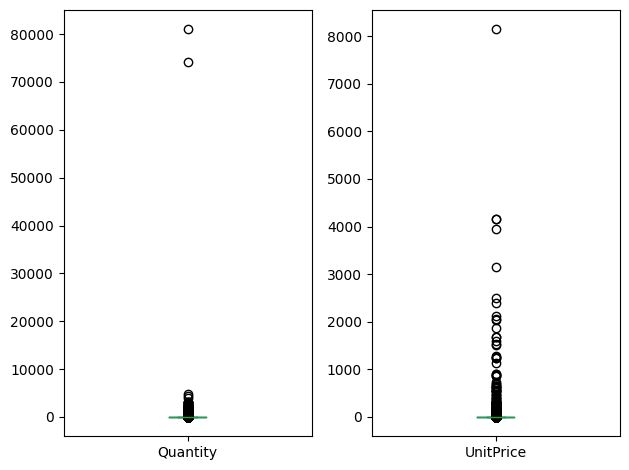

In [19]:
df[['Quantity','UnitPrice']].plot(kind='box', subplots=True)
plt.tight_layout()
plt.show()

In [20]:
df = df.query('Quantity<10000 & UnitPrice<5000')

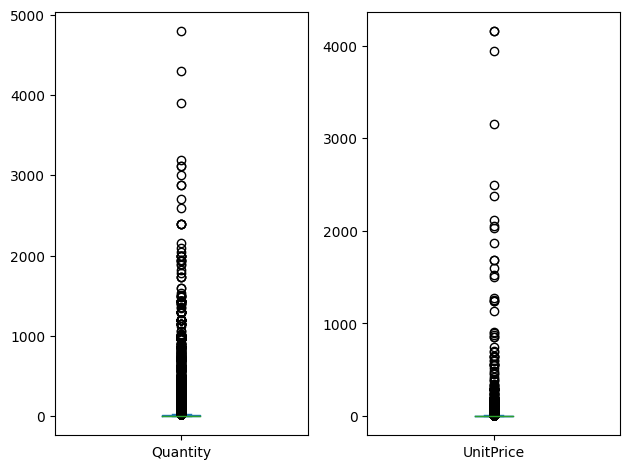

In [21]:
df[['Quantity','UnitPrice']].plot(kind='box', subplots=True)
plt.tight_layout()
plt.show()

## Add total price of items

In [22]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## Graphics

Top 10 países com mais vendas em valor

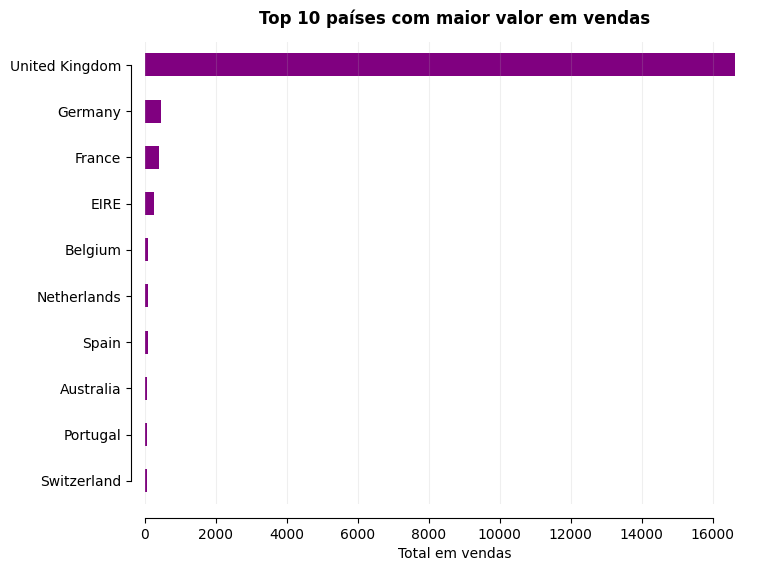

In [23]:
df_top10_countries = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

df_top10_countries[::-1].plot(kind='barh', color='purple', figsize=(8,6))
plt.title('Top 10 países com maior valor em vendas', weight='bold', y=1.02)
plt.xlabel('Total em vendas')
plt.ylabel(None)
plt.grid(axis='x', alpha=.2)
sns.despine(trim=True, offset=10)
plt.show()

Top 10 produtos com mais vendas em quantidade

In [24]:
fig = df.groupby('Description').Quantity.sum().sort_values(ascending=False).head(10).plot.bar(backend='plotly')
fig.update_layout(template='simple_white', xaxis_title='', yaxis_title='Quantidade total', title_text='<b>Top 10 produtos mais vendidos</b>', title_y=.98)

Valor total de vendas por mês

In [25]:
df_monthly_sales = df.set_index('InvoiceDate').resample('MS')['TotalPrice'].sum()
fig = px.line(x=df_monthly_sales.index, y=df_monthly_sales.values, markers=True)
fig.update_layout(xaxis_title='', yaxis_title='Soma das vendas', title_text='<b>Valor total de vendas por mês</b>', title_x=.5, template='simple_white')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Valor total de vendas por mês e país (top 10)

In [26]:
df_monthly_sales_by_country = (
  df
 .query('Country in @df_top10_countries.index')
 .assign(month_date = df.InvoiceDate.dt.strftime('%Y-%m-01'))
 .groupby(['month_date','Country'])
 .TotalPrice.sum()
 .reset_index()
)

px.line(df_monthly_sales_by_country, x='month_date', y='TotalPrice', color='Country', markers=True)

## Calculation of RFM

Data da última compra disponível no dataset:

In [27]:
ultima_compra = df.InvoiceDate.max()
print(ultima_compra)

2011-12-09 12:50:00


### Dataset com resumo dos pedidos por cliente

In [28]:
df_customer_purchase = (
    df.groupby(['CustomerID','InvoiceNo'])
    .agg(
        last_purchase = ('InvoiceDate', 'max'),
        total_purchase = ('TotalPrice', 'sum'),
    )
    .reset_index()
)

df_customer_purchase

,CustomerID,InvoiceNo,last_purchase,total_purchase
0,12347,537626,2010-12-07 14:57:00,711.79
1,12347,542237,2011-01-26 14:30:00,475.39
2,12347,549222,2011-04-07 10:43:00,636.25
3,12347,556201,2011-06-09 13:01:00,382.52
4,12347,562032,2011-08-02 08:48:00,584.91
...,...,...,...,...
18524,18283,579673,2011-11-30 12:59:00,220.31
18525,18283,580872,2011-12-06 12:02:00,208.00
18526,18287,554065,2011-05-22 10:39:00,765.28
18527,18287,570715,2011-10-12 10:23:00,1001.32


### Dataset with RFM metrics

In [29]:
df_rfm = (
    df_customer_purchase
    .groupby('CustomerID')
    .agg(
        R = ('last_purchase', lambda x: (ultima_compra - x.max()).days),
        F = ('InvoiceNo', 'count'),
        M = ('total_purchase', 'mean')
    )
)

df_rfm

,R,F,M
CustomerID,,,
12347,1,7,615.714286
12348,74,4,449.310000
12349,18,1,1757.550000
12350,309,1,334.400000
12352,35,8,313.255000
...,...,...,...
18280,277,1,180.600000
18281,180,1,80.820000
18282,7,2,89.025000


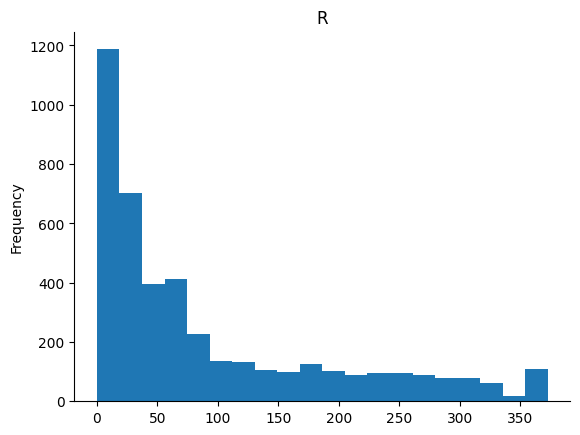

In [34]:
# @title Recency

from matplotlib import pyplot as plt
df_rfm['R'].plot(kind='hist', bins=20, title='R')
plt.gca().spines[['top', 'right',]].set_visible(False)

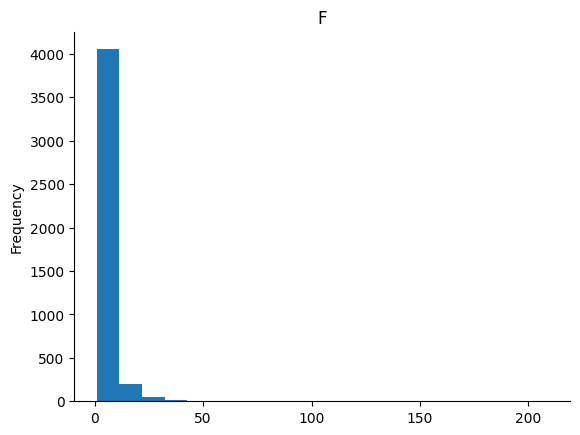

In [35]:
# @title Frequency

from matplotlib import pyplot as plt
df_rfm['F'].plot(kind='hist', bins=20, title='F')
plt.gca().spines[['top', 'right',]].set_visible(False)

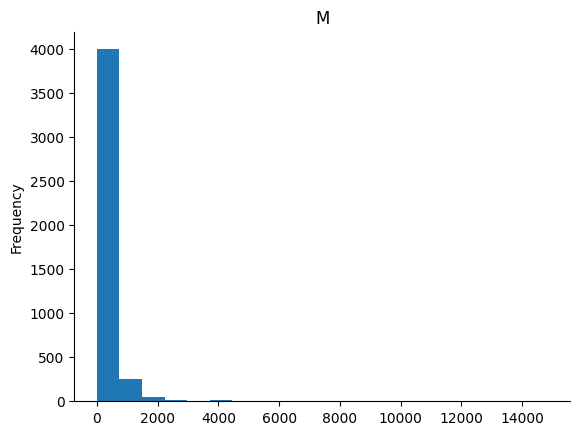

In [36]:
# @title Meam

from matplotlib import pyplot as plt
df_rfm['M'].plot(kind='hist', bins=20, title='M')
plt.gca().spines[['top', 'right',]].set_visible(False)

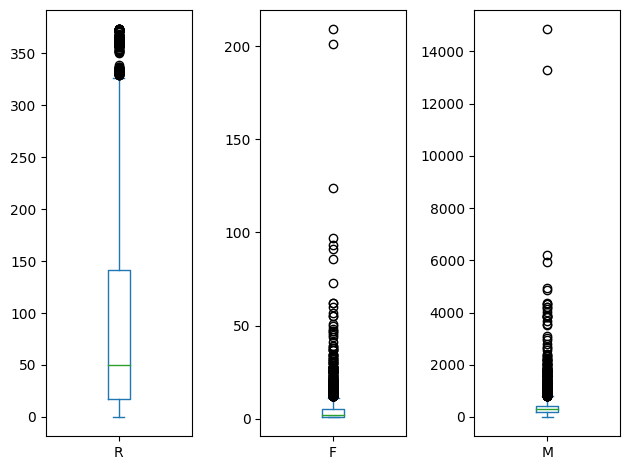

In [30]:
df_rfm.plot.box(subplots=True)
plt.tight_layout()
plt.show()

In [31]:
px.scatter_3d(df_rfm, x='R', y='F', z='M')

### Output final

In [32]:
df_rfm.head()

,R,F,M
CustomerID,,,
12347,1,7,615.714286
12348,74,4,449.310000
12349,18,1,1757.550000
12350,309,1,334.400000
12352,35,8,313.255000


In [33]:
df_rfm.to_csv('e-commerce_RFM.csv')